<a href="https://colab.research.google.com/github/elifbeyzatok00/GRI_Detection_and_Merger/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON To Text

### Bir JSON dosyası içinden gerekli veriyi(Report_ID ve PDF content) çek.

Her bir report içindeki PDF i text file a çevir. Ve report_ID.txt adı ile kaydet

In [ ]:
import json
import os
import re

# JSON dosyasının yolunu belirtin
json_path = '/content/02_text_8.json'

# JSON dosyasını oku
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

# PDF anahtarlarını dinamik olarak almak için regex kullanın
json_data = []
for report in data:
    pdf_dict = report.get("PDF", {})
    pdf_content = ""
    for key in pdf_dict:
        ''' PDF dict içindeki key farklı rakamlar olabiliyor.
        "PDF": report.get("PDF", {}).get("1", "") gibi ifadeler PDF dict içindeki key "2" ya da "4" gibi rakamlar olan reportların içeriğini çekemiyor.
        Anahtarın sayı olup olmadığını kontrol eden regex bloğu ile key farklı rakamlar olduğunda bile algılıyor ve sorunu çözüyor'''
        if re.match(r'^\d+$', key):
            if isinstance(pdf_dict[key], list):
                pdf_content += ' '.join(pdf_dict[key]) + " "
            else:
                pdf_content += pdf_dict[key] + " "
    json_data.append({
        "Report_ID": report.get("Report_ID", ""),
        "PDF": pdf_content.strip()  # İçeriği toplama işlemi tamamlandığında boşlukları temizle
    })

# report lar için bir klasör oluştur
folder_name = json_path.split('/')[-1].split('.')[0] + '_reports'
os.makedirs(folder_name, exist_ok=True)

# json_data içindeki her report için bir txt dosyası oluştur ve kaydet
for report in json_data:
    report_id = report.get("Report_ID", "")
    pdf_content = report.get("PDF", "")
    txt_file_path = os.path.join(folder_name, f'{report_id}.txt')

    # txt dosyasını oluştur ve içerisine yaz
    with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(pdf_content)

print("Tüm dosyalar başarıyla oluşturuldu ve kaydedildi.")


Tüm dosyalar başarıyla oluşturuldu ve kaydedildi.


# !! colab içide tüm pdf content mükemmel çıkarılıyor ve klasöre kayıt ediliyor. Ama zip olarak pc ye inince bazı txt dosyalaın içi boş. Bunu düzelt !!

In [ ]:
# Raporların olduğu klasörü masaüstüne kaydet
from google.colab import files

!zip -r {folder_name}.zip reports
files.download(f'{folder_name}.zip')

  adding: reports/ (stored 0%)
  adding: reports/18485.txt (deflated 65%)
  adding: reports/14852.txt (deflated 65%)
  adding: reports/15746.txt (stored 0%)
  adding: reports/16604.txt (deflated 57%)
  adding: reports/17852.txt (stored 0%)
  adding: reports/17987.txt (stored 0%)
  adding: reports/11385.txt (deflated 70%)
  adding: reports/11184.txt (deflated 70%)
  adding: reports/17834.txt (deflated 62%)
  adding: reports/11394.txt (deflated 69%)
  adding: reports/18288.txt (deflated 62%)
  adding: reports/11989.txt (deflated 68%)
  adding: reports/17972.txt (deflated 62%)
  adding: reports/15926.txt (deflated 68%)
  adding: reports/14495.txt (deflated 64%)
  adding: reports/10932.txt (deflated 72%)
  adding: reports/11964.txt (deflated 68%)
  adding: reports/12656.txt (stored 0%)
  adding: reports/18629.txt (deflated 64%)
  adding: reports/14211.txt (stored 0%)
  adding: reports/10701.txt (deflated 66%)
  adding: reports/11938.txt (stored 0%)
  adding: reports/16813.txt (stored 0%)
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# NER Annotation with Text

* Her bir repor_ID.txt içindeki text i [NER annotation tool](https://tecoholic.github.io/ner-annotator/)  ile etiketle

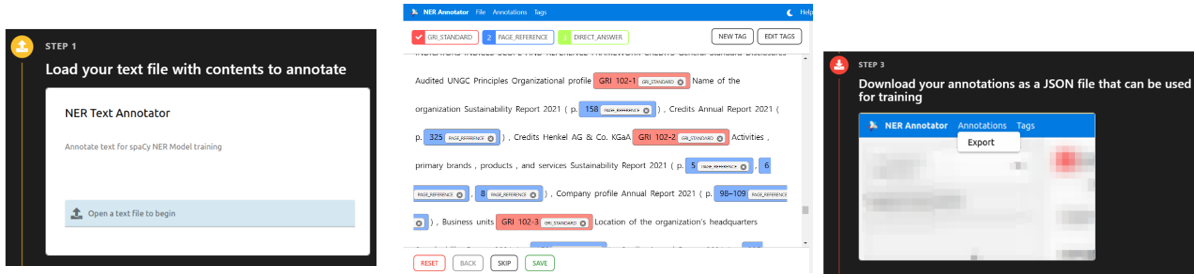

# Text To JSON

* etiketlenen metin annotations.json olarak kaydedilir. **manual olarak** adı Report_ID_annotations.json a çevirilir.

* xx_text_x_reports_annotations adlı boş bir klasör açılır. Ve xx_text_x.json'dan elde edilen tüm Report_ID_annotations.json dosyaları bu klasörde toplanır.

# Create Training Dataset with JSON for NER model

* xx_text_x_reports_annotations adlı klasör içindeki report.json adlı dosyalar (etiketlenmiş PDF text dosyaları) çekilerek veri seti oluşturulur

In [1]:
import os
import json

# Klasör yolu
folder_path = '/content/02_text_8_reports_annotations' # change path name

# TRAIN_DATA dizisi
TRAIN_DATA = []

# Klasördeki tüm JSON dosyalarını oku
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            if 'annotations' in data:
                for annotation in data['annotations']:
                    if annotation is not None:
                        text = annotation[0]
                        entities = [(ent[0], ent[1], ent[2]) for ent in annotation[1]['entities']]
                        TRAIN_DATA.append((text, {'entities': entities}))

print(TRAIN_DATA)

[('SUSTAINABILITY  REPORT 2021   03 Foreword  04 Company Profile  06 Business model  07 Value added  09 Strategy  10 Sustainability strategy  14 Material issues  18 Targets and ambitions  20 Contributions to the SDGs  22 Trusted Partner  24 Products and technologies   24  Contribution of our product portfolio   to sustainability    28 Improved efficiency  29 Sustainability management   29 Steering   30 Organization   32 Measurement and evaluation  35 Stakeholder management  39 Compliance   39 Organization for compliance   40 Audits  41 Product safety  45 Sourcing   45 Responsible sourcing   47 Sourcing process   49 Together for a sustainable supply chain  52 Sustainable finance  56 External assessments  58 Regenerative Planet  60 Climate   60 Climate change mitigation   63 Production   66 Logistics and mobility   69 Contribution of our products and technologies  72 Circular economy   72 Material cycles   73 Packaging   81 Production waste  83 Natural resources    83 Biodiversity   84 R

# ! TRAIN DATA arttır etiketleyerek.

# NER model oluştur

In [2]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding

# Load the pre-trained model
nlp = spacy.load("en_core_web_sm")

# Create a blank model
nlp = spacy.blank("en")

# Add the NER pipeline
ner = nlp.add_pipe("ner")

# Add new entity labels
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other pipelines
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Begin training
with nlp.disable_pipes(*unaffected_pipes):
    optimizer = nlp.begin_training()
    for itn in range(100):  # Number of iterations
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            example = [Example.from_dict(nlp.make_doc(text), ann) for text, ann in zip(texts, annotations)]
            nlp.update(example, drop=0.5, losses=losses)
        print(f"Iteration {itn}, Losses: {losses}")

# Save the model
nlp.to_disk("custom_ner_model")

# Load the trained model
nlp = spacy.load("custom_ner_model")

/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "SUSTAINABILITY  REPORT 2021   03 Foreword  04 Comp..." with entities "[(359635, 359644, 'GRI_STANDARD'), (359701, 359704...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Iteration 0, Losses: {'ner': 68641.29724121094}
Iteration 1, Losses: {'ner': 65744.74829101562}
Iteration 2, Losses: {'ner': 62698.11804199219}
Iteration 3, Losses: {'ner': 58367.3385925293}
Iteration 4, Losses: {'ner': 53145.48629760742}
Iteration 5, Losses: {'ner': 46980.458892822266}
Iteration 6, Losses: {'ner': 39569.407318115234}
Iteration 7, Losses: {'ner': 29340.539108276367}
Iteration 8, Losses: {'ner': 19039.195404052734}
Iteration 9, Losses: {'ner': 10478.071975708008}
Iteration 10, Losses: {'ner': 3844.271831512451}
Iteration 11, Losses: {'ner': 1767.636040687561}
Iteration 12, Losses: {'ner': 208.8157012462616}
Iteration 13, Losses: {'ner': 77.21810756623745}
Iteration 14, Losses: {'ner': 28.06061934772879}
Iteration 15, Losses: {'ner': 20.091177295689704}
Iteration 16, Losses: {'ner': 20.010927275589438}
Iteration 17, Losses: {'ner': 20.02074411075884}
Iteration 18, Losses: {'ner': 20.00005165703576}
Iteration 19, Losses: {'ner': 21.999816472951295}
Iteration 20, Losses: {

### Test NER Model

In [3]:
sample_report_path = "/content/15469.txt"

with open(sample_report_path, "r") as file:
    sample_text = file.read()

doc = nlp(sample_text)
for ent in doc.ents:
    print(ent.text, ent.label_)


In [5]:
doc

SUSTAINABILITY  REPORT 2021   03 Foreword  04 Company Profile  06 Business model  07 Value added  09 Strategy  10 Sustainability strategy  14 Material issues  18 Targets and ambitions  20 Contributions to the SDGs  22 Trusted Partner  24 Products and technologies   24  Contribution of our product portfolio   to sustainability    28 Improved efficiency  29 Sustainability management   29 Steering   30 Organization   32 Measurement and evaluation  35 Stakeholder management  39 Compliance   39 Organization for compliance   40 Audits  41 Product safety  45 Sourcing   45 Responsible sourcing   47 Sourcing process   49 Together for a sustainable supply chain  52 Sustainable finance  56 External assessments  58 Regenerative Planet  60 Climate   60 Climate change mitigation   63 Production   66 Logistics and mobility   69 Contribution of our products and technologies  72 Circular economy   72 Material cycles   73 Packaging   81 Production waste  83 Natural resources    83 Biodiversity   84 Raw 

# NER modele etiketlenmemiş bir report ver

# !! a, b = ?

In [ ]:
import os

files = os.listdir(folder_name)

# apply the NER model to reports in folder
for file in files:
    print(f"Report_ID: {file}")
    with open(file, "r") as file:
        file = file.read()
        doc = nlp(file)
        for ent in doc.ents:
            print(ent.text, ent.label_)

In [ ]:
import os
import json

# Klasör yolu
folder_path = '/content/02_text_8_reports_annotations' # change path name

# TRAIN_DATA dizisi
TRAIN_DATA = []

# Klasördeki tüm JSON dosyalarını oku
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            if 'annotations' in data:
                for annotation in data['annotations']:
                    if annotation is not None:
                        text = annotation[0]
                        entities = [(ent[0], ent[1], ent[2]) for ent in annotation[1]['entities']]
                        TRAIN_DATA.append((text, {'entities': entities}))

print(TRAIN_DATA)

# NER model evaluation kodu yaz

# ! EVAL_DATA ekle

In [ ]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding
from spacy.scorer import Scorer

# Load the trained model
nlp = spacy.load("custom_ner_model")

# Evaluation data (similar format to TRAIN_DATA)
EVAL_DATA = [

]

# Function to evaluate the model
def evaluate_model(nlp, eval_data):
    scorer = Scorer()
    examples = []
    for text, annotations in eval_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        examples.append(example)

    scores = nlp.evaluate(examples)
    return scores

# Evaluate the model
scores = evaluate_model(nlp, EVAL_DATA)

# Print evaluation scores
print("Overall Evaluation Scores:")
print(scores)

# Print detailed entity-level scores
print("\nEntity-level Evaluation Scores:")
for ent_type, ent_scores in scores["ents_per_type"].items():
    print(f"{ent_type}: {ent_scores}")


The evaluation scores provide insights into how well your custom Named Entity Recognition (NER) model is performing. Here’s what each part of the output means:

### Overall Evaluation Scores:
- **token_acc**: The accuracy of tokenization. A score of 1.0 means perfect tokenization.
- **token_p**: The precision of tokenization. A score of 1.0 indicates perfect precision.
- **token_r**: The recall of tokenization. A score of 1.0 indicates perfect recall.
- **token_f**: The F1 score of tokenization. A score of 1.0 indicates perfect F1 score.
- **ents_p**: The overall precision for entity recognition. A score of 0.5 means that 50% of the entities predicted by the model are correct.
- **ents_r**: The overall recall for entity recognition. A score of 1.0 means that the model identified all the entities correctly.
- **ents_f**: The overall F1 score for entity recognition. An F1 score of 0.666 indicates a balance between precision and recall.
- **ents_per_type**: Detailed scores for each entity type.

### Entity-level Evaluation Scores:
- **gri_standard**:
  - **p** (precision): 1.0 - The model correctly identified all instances of the `gri_standard` entity type.
  - **r** (recall): 1.0 - The model found all the `gri_standard` entities in the evaluation data.
  - **f** (F1 score): 1.0 - The F1 score combines precision and recall into a single metric, and a score of 1.0 indicates perfect performance for this entity type.
- **page_reference**:
  - **p** (precision): 0.0 - The model did not correctly identify any instances of the `page_reference` entity type.
  - **r** (recall): 0.0 - The model did not find any of the `page_reference` entities in the evaluation data.
  - **f** (F1 score): 0.0 - The F1 score indicates very poor performance for this entity type.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to visualize entity-level scores
def plot_entity_scores(scores):
    # Prepare data for plotting
    ent_types = list(scores["ents_per_type"].keys())
    precision = [scores["ents_per_type"][ent]["p"] for ent in ent_types]
    recall = [scores["ents_per_type"][ent]["r"] for ent in ent_types]
    f1 = [scores["ents_per_type"][ent]["f"] for ent in ent_types]

    df_scores = pd.DataFrame({
        'Entity Type': ent_types,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Plot
    plt.figure(figsize=(12, 6))
    df_scores.set_index('Entity Type').plot(kind='bar', colormap='viridis')
    plt.title('Entity-Level Scores')
    plt.xlabel('Entity Type')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metrics')
    plt.tight_layout()
    plt.show()

# Example scores (replace with actual scores from your evaluation)
scores = evaluate_model(nlp, EVAL_DATA)

# Plot entity-level scores
plot_entity_scores(scores)


# page_references ve direct_answer kullanmak için kaydet

In [ ]:
# Etiketlenen verileri depolamak için boş bir listeler oluşturun
page_references = []
direct_answer = []
gri_standard = []

# Şimdi, NER modelini uygulayın
for a in b:
    doc = nlp(a)
    for ent in doc.ents:
        if ent.label_ == 'page_reference':
            # Sayıları listeye ekleyin
            page_references.append(ent.text)
        elif ent.label_ == 'direct_answer':
            direct_answer.append(ent.text)
        else ent.label_ == 'gri_standard':
            gri_standard.append(ent.text)

# Sonuçları kontrol edin
print("Page References:", page_references)
print("\n")
print("Direct Answers:", direct_answer)
print("\n")
print("GRI STANDARD:", gri_standard)


# page reference a göre page text yazdırma ve direct answer yazdırma

In [3]:
# tek bir report verilmeli. etiketlenmemeiş report_ID.txt

# ! drivedaki EN pdfs içindeki pdflerin isimleri ile report_ID isimleri eşleştirilecek

In [ ]:
# JSON dosyası içindeki Report_ID leri bir değişkene kaydet
# Drive daki pdf isimlerini bir değişkene kaydet

In [ ]:
# dict = {"Report_ID": "pdf name"} oluştur

# ! eşleşen isimlere göre drivedaki ilgili pdf çekilecek ve page_ref göre text yazdırılacak

In [ ]:
# dict içine git Report_ID lerde gez. Eşleşmeyi yakala. eşleşen pdf name i bul

In [ ]:
# pdf name e göre drivedan pdf i çek

# ! pdf_path kısmını dinamik(değişken) hale getir.

In [ ]:
# page reference a göre page text yazdırma ve direct answer yazdır

import numpy as np
import re
import fitz  # PyMuPDF


# Helper function to check if a string is a valid number
def is_valid_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Process direct answers
def process_direct_answers(direct_answers):
    processed_direct_answer = [item for item in direct_answers if item and item != 'NaN' and item != ' ']
    print(f"Direct Answers: \n")
    for answer in processed_direct_answer:
        print(f"* {answer}\n")

# Process page references
def process_page_references(page_refs):
    processed_page_ref = []
    for reference in page_refs:
        reference = reference.replace("–", "-").strip()
        if '-' in reference:
            parts = reference.split('-')
            if len(parts) == 2 and all(is_valid_number(part) for part in parts):
                start, end = map(int, parts)
                if start <= end:
                    processed_page_ref.extend(range(start, end + 1))
                else:
                    print(f"Başlangıç sayısı bitiş sayısından büyük: {reference}")
            else:
                print(f"Geçersiz aralık formatı: {reference}")
        elif is_valid_number(reference):
            processed_page_ref.append(int(reference))
        else:
            print(f"Geçersiz referans: {reference}")
    processed_page_ref = sorted(set(processed_page_ref))
    print("\n\n" + "-"*50 + "\n\n")
    print("Page References:\n")
    print(f"{processed_page_ref}")
    return processed_page_ref

# Extract and print pages from PDF
def extract_and_print_pages(pdf_path, page_numbers):
    print("The Texts on PDF's Reference Pages: \n\n")
    pdf_document = fitz.open(pdf_path)
    for page_number in page_numbers:
        actual_page_number = page_number + 2 # +2 meaning: cover page + content table page
        if actual_page_number < 1 or actual_page_number > len(pdf_document):
            print(f"Geçersiz sayfa numarası: {page_number}")
            continue
        page = pdf_document.load_page(actual_page_number - 1)
        text = page.get_text()
        print(f"--- Sayfa {page_number} (Gerçek Sayfa {actual_page_number}) ---")
        print(text)
        print("\n" + "="*40 + "\n")
    pdf_document.close()

# Main logic
pdf_path = "/content/350641_1.pdf"  # PDF dosyasının yolunu buraya girin

if direct_answer and page_references:
    process_direct_answers(direct_answer)
    processed_page_ref = process_page_references(page_references)
    print("\n\n" + "-"*50 + "\n\n")
    extract_and_print_pages(pdf_path, processed_page_ref)
elif direct_answer:
    process_direct_answers(direct_answer)
elif page_references:
    processed_page_ref = process_page_references(page_references)
    extract_and_print_pages(pdf_path, processed_page_ref)


# çıktıyı txt dosyasına kaydet